In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import os

In [15]:
# Fonction pour effectuer une régression et afficher les résultats
def regression_and_plot_grouped(df, x_col, y_col, title):
    X = df[x_col].values.reshape(-1, 1)  # Variable explicative
    y = df[y_col].values  # Variable cible

    # Modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Prédictions
    y_pred = model.predict(X)

    # Calcul de l'erreur quadratique moyenne
    mse = mean_squared_error(y, y_pred)

    # Coefficients du modèle
    coef = model.coef_[0]
    intercept = model.intercept_

    # Affichage des résultats
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, label='Données réelles', s=100)
    plt.plot(df[x_col], y_pred, color='red', label=f'Regression line (y = {coef:.2f}x + {intercept:.2f})')
    plt.title(title, fontsize=16)
    plt.xlabel(x_col.replace('_', ' ').capitalize(), fontsize=14)
    plt.ylabel(y_col.replace('_', ' ').capitalize(), fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Résumé
    print(f"--- {title} ---")
    print("Erreur quadratique moyenne :", mse)
    print("Coefficient de régression :", coef)
    print("Intercept :", intercept)

In [16]:
# Charger les données
elon_df = pd.read_csv(os.path.join('..','data_fin','tweets_fusionnes_def.csv'))
bluesky_df = pd.read_csv(os.path.join('..','data_fin','bluesky_def.csv'))


In [17]:
# Calculer les moyennes de toxicité par YearWeek
elon_avg_toxicity = elon_df.groupby('YearWeek')['violence_prédite'].mean().reset_index()
bluesky_avg_toxicity = bluesky_df.groupby('YearWeek')['violence_prédite'].mean().reset_index()

# Fusionner les deux moyennes sur YearWeek
merged_data = pd.merge(elon_avg_toxicity, bluesky_avg_toxicity, on='YearWeek', suffixes=('_elon', '_bluesky'))

# Préparer les données pour la régression
X = merged_data['violence_prédite_elon'].values.reshape(-1, 1)  # Variable explicative
y = merged_data['violence_prédite_bluesky'].values  # Variable cible

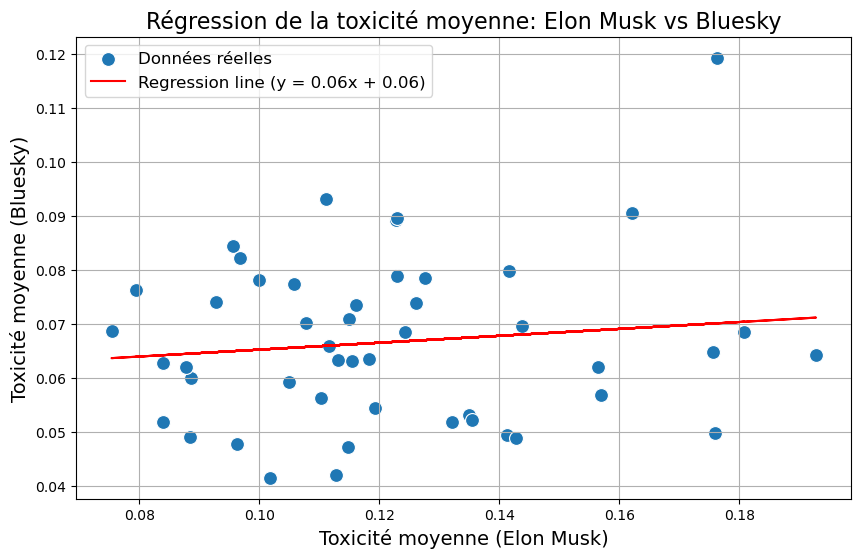

Erreur quadratique moyenne : 0.00022915813962696012
Coefficient de régression : 0.06384571470589126
Intercept : 0.058883327310458575


In [18]:
# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions
y_pred = model.predict(X)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y, y_pred)

# Coefficients du modèle
coef = model.coef_[0]
intercept = model.intercept_

# Affichage des résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='violence_prédite_elon', y='violence_prédite_bluesky', data=merged_data, label='Données réelles', s=100)
plt.plot(merged_data['violence_prédite_elon'], y_pred, color='red', label=f'Regression line (y = {coef:.2f}x + {intercept:.2f})')
plt.title('Régression de la toxicité moyenne: Elon Musk vs Bluesky', fontsize=16)
plt.xlabel('Toxicité moyenne (Elon Musk)', fontsize=14)
plt.ylabel('Toxicité moyenne (Bluesky)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Résumé
print("Erreur quadratique moyenne :", mse)
print("Coefficient de régression :", coef)
print("Intercept :", intercept)


/tmp/ipykernel_75743/181325020.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_avg_toxicity1 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération1'])).reset_index(name='violence_prédite_elon1')
/tmp/ipykernel_75743/181325020.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_avg_toxicity1 = bluesky_df.groupby('YearWeek').apply(lambda x: np.

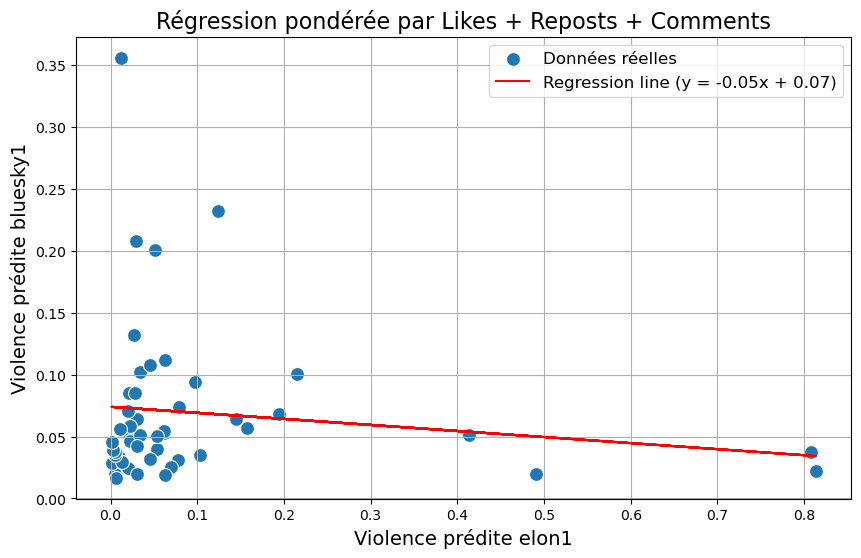

--- Régression pondérée par Likes + Reposts + Comments ---
Erreur quadratique moyenne : 0.00391708395782011
Coefficient de régression : -0.048846833773545345
Intercept : 0.07400880287292254


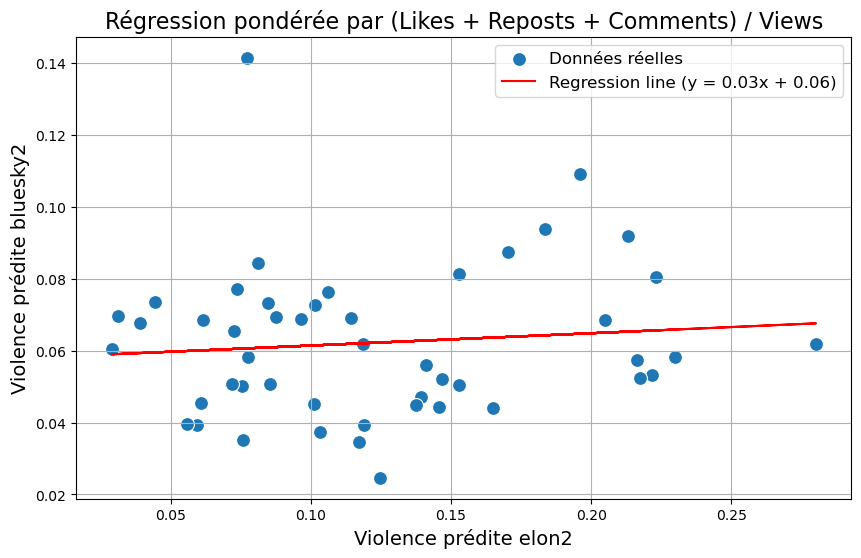

--- Régression pondérée par (Likes + Reposts + Comments) / Views ---
Erreur quadratique moyenne : 0.00043428539956603815
Coefficient de régression : 0.034310197758351785
Intercept : 0.05800673461736353


In [19]:

elon_df['pondération1'] = elon_df['Likes'] + elon_df['Repost'] + elon_df['Comments']
elon_df['pondération2'] = elon_df['pondération1'] / elon_df['Views']
bluesky_df['pondération1'] = bluesky_df['Likes'] + bluesky_df['Repost'] + bluesky_df['Comments']
bluesky_df['pondération2'] = bluesky_df['pondération1'] / bluesky_df['Views']

# Calculer les moyennes pondérées de toxicité par YearWeek
elon_avg_toxicity1 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération1'])).reset_index(name='violence_prédite_elon1')
bluesky_avg_toxicity1 = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération1'])).reset_index(name='violence_prédite_bluesky1')

elon_avg_toxicity2 = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération2'])).reset_index(name='violence_prédite_elon2')
bluesky_avg_toxicity2 = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération2'])).reset_index(name='violence_prédite_bluesky2')

# Fusionner les deux moyennes pondérées sur YearWeek pour les deux méthodes
merged_data1 = pd.merge(elon_avg_toxicity1, bluesky_avg_toxicity1, on='YearWeek')
merged_data2 = pd.merge(elon_avg_toxicity2, bluesky_avg_toxicity2, on='YearWeek')


# Régression et graphiques pour la première pondération
regression_and_plot_grouped(merged_data1, 'violence_prédite_elon1', 'violence_prédite_bluesky1', 'Régression pondérée par Likes + Reposts + Comments')

# Régression et graphiques pour la deuxième pondération

regression_and_plot_grouped(merged_data2, 'violence_prédite_elon2', 'violence_prédite_bluesky2', 'Régression pondérée par (Likes + Reposts + Comments) / Views')

/tmp/ipykernel_75743/1637809544.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_avg_toxicity_views = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_elon_views')
/tmp/ipykernel_75743/1637809544.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_avg_toxicity_views = bluesky_df.groupby('YearWeek

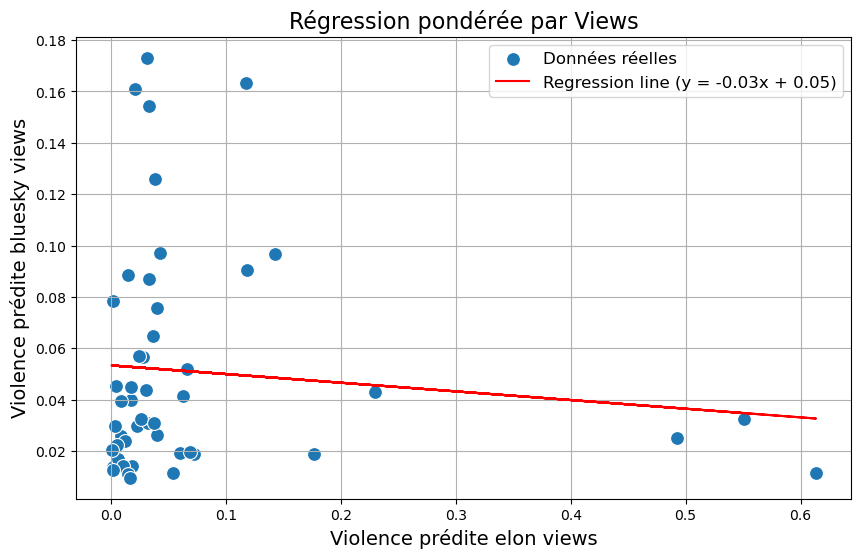

--- Régression pondérée par Views ---
Erreur quadratique moyenne : 0.0018653234958580795
Coefficient de régression : -0.03370459789614931
Intercept : 0.05335971143892456


In [20]:
# Ajouter une colonne de pondération par les vues
elon_df['pondération_views'] = elon_df['Views']
bluesky_df['pondération_views'] = bluesky_df['Views']

# Calculer les moyennes pondérées de toxicité par YearWeek
elon_avg_toxicity_views = elon_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_elon_views')
bluesky_avg_toxicity_views = bluesky_df.groupby('YearWeek').apply(lambda x: np.average(x['violence_prédite'], weights=x['pondération_views'])).reset_index(name='violence_prédite_bluesky_views')

# Fusionner les moyennes pondérées sur YearWeek
merged_data_views = pd.merge(elon_avg_toxicity_views, bluesky_avg_toxicity_views, on='YearWeek')

# Régression et graphique pour la pondération par les vues
regression_and_plot_grouped(merged_data_views, 'violence_prédite_elon_views', 'violence_prédite_bluesky_views', 'Régression pondérée par Views')


/tmp/ipykernel_75743/1644470132.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bluesky_grouped = bluesky_df.groupby('YearWeek').apply(
/tmp/ipykernel_75743/1644470132.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  elon_grouped = elon_df.groupby('YearWeek').apply(


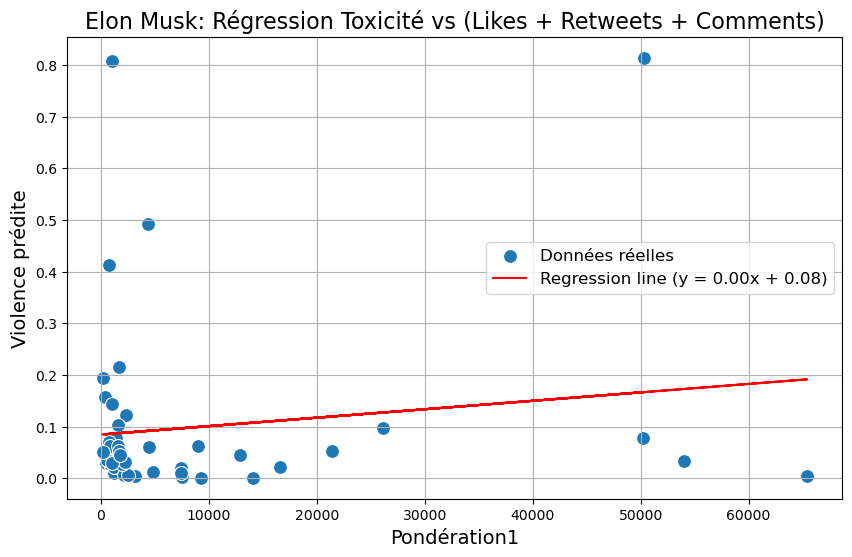

--- Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) ---
Erreur quadratique moyenne : 0.030255297794137964
Coefficient de régression : 1.633335478330907e-06
Intercept : 0.08461497796566661


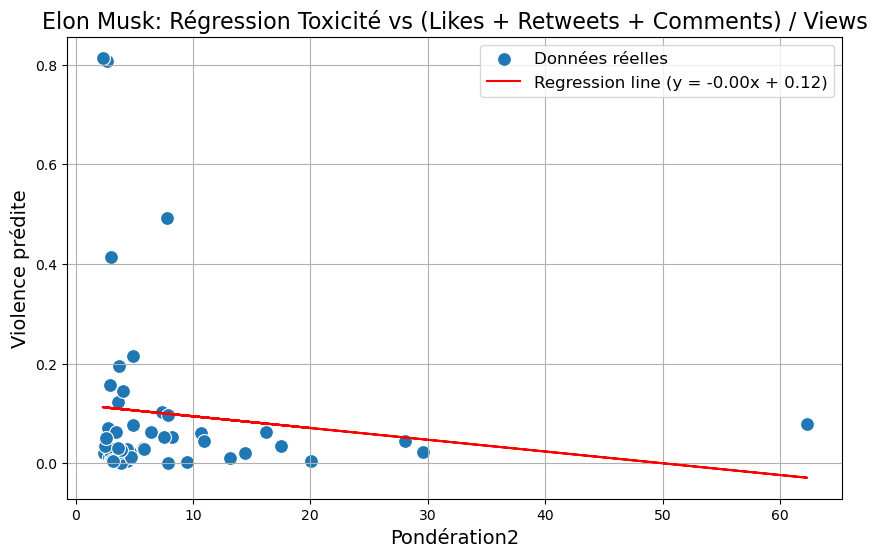

--- Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) / Views ---
Erreur quadratique moyenne : 0.030312670031914696
Coefficient de régression : -0.002356814365264294
Intercept : 0.11787507002519194


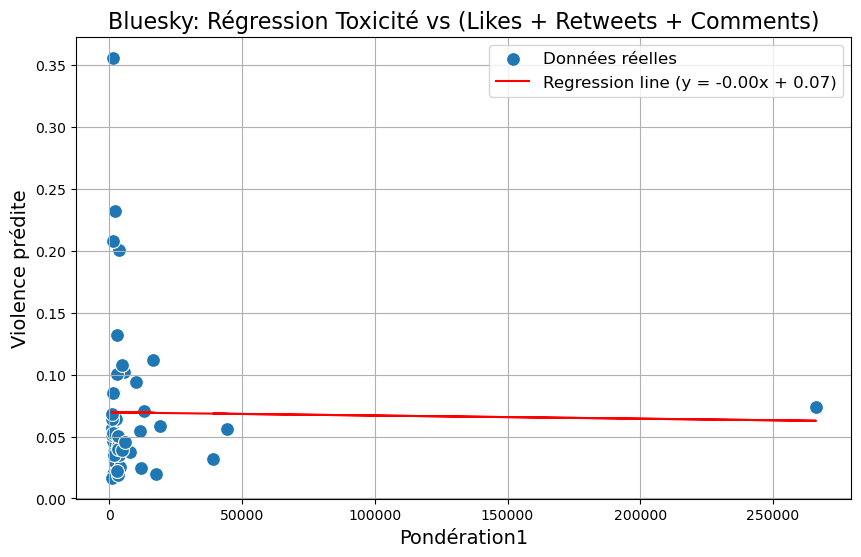

--- Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) ---
Erreur quadratique moyenne : 0.00398979667767712
Coefficient de régression : -2.5411556196070052e-08
Intercept : 0.06948658072763945


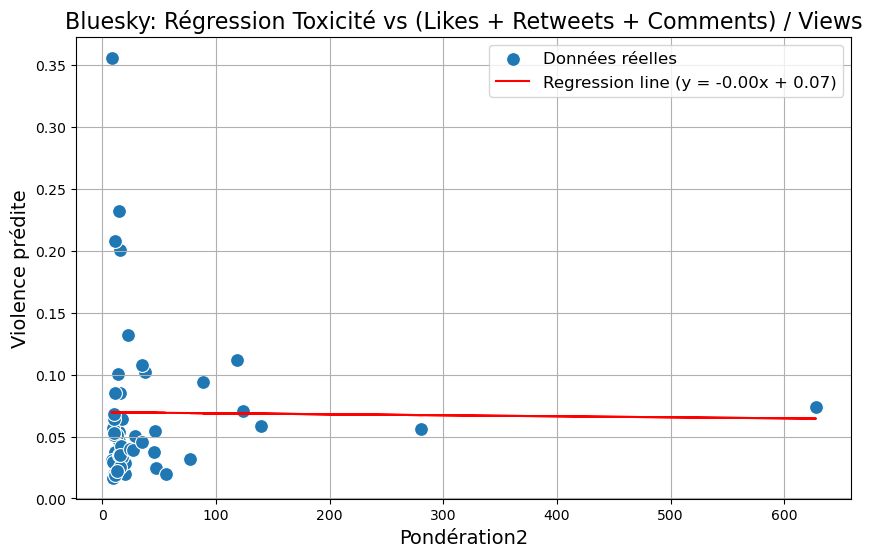

--- Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) / Views ---
Erreur quadratique moyenne : 0.003990117670828676
Coefficient de régression : -8.120600804317445e-06
Intercept : 0.06957799337295789


In [21]:
bluesky_grouped = bluesky_df.groupby('YearWeek').apply(
    lambda x: pd.Series({
        'violence_prédite': np.average(x['violence_prédite'], weights=x['pondération1']),
        'pondération1': x['pondération1'].sum(),
        'pondération2': (x['pondération1'] / x['Views']).sum()
    })
    ).reset_index()

elon_grouped = elon_df.groupby('YearWeek').apply(
    lambda x: pd.Series({
        'violence_prédite': np.average(x['violence_prédite'], weights=x['pondération1']),
        'pondération1': x['pondération1'].sum(),  # Somme des pondérations
        'pondération2': (x['pondération1'] / x['Views']).sum()  # Somme des pondérations normalisées
    })
).reset_index()

# Régression pour Elon Musk - pondération1
regression_and_plot_grouped(elon_grouped, 'pondération1', 'violence_prédite', 'Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments)')

# Régression pour Elon Musk - pondération2
regression_and_plot_grouped(elon_grouped, 'pondération2', 'violence_prédite', 'Elon Musk: Régression Toxicité vs (Likes + Retweets + Comments) / Views')

# Régression pour Bluesky - pondération1
regression_and_plot_grouped(bluesky_grouped, 'pondération1', 'violence_prédite', 'Bluesky: Régression Toxicité vs (Likes + Retweets + Comments)')

# Régression pour Bluesky - pondération2
regression_and_plot_grouped(bluesky_grouped, 'pondération2', 'violence_prédite', 'Bluesky: Régression Toxicité vs (Likes + Retweets + Comments) / Views')


  